<table style="background-color:#F5F5F5;" width="100%">
<tr><td style="background-color:#F5F5F5;">    <tr><td>
            <h2><center>Aprendizagem Automática em Engenharia Biomédica</center></h2>
            <h3><center>1st Semester - 2024/2025</center></h3>
            <h4><center>Universidade Nova de Lisboa - Faculdade de Ciências e Tecnologia</center></h4>
</td></tr>
    <tr><td><h2><b><center>Project</center></b></h2>
    <h4><i><b><center>Predicting Cervical Cancer: A Machine Learning Approach Using Risk Factor Analysis 
</center></b></i></h4></td></tr>
</table>


 <h3>Requesitos nos  modelos </h3>
 <li> Comparison of at least 3 models</li>
 <li>Cross-Validation</li>
 <li> Grid Search </li>
 <li> Results evaluation and discussion </li>


<h3>Avaliação </h3>

 <li> Quality of coding (temos de tipo comentar e explicar tudo)</li>
 <li>Creativity</li>
 <li> Comparison with the state of the Art </li>



<h3>1. Introduction</h3>

Cervical cancer is the fourth most common cancer worldwide and a significant cause of mortality, particularly in low- and middle-income countries, where 94% of all deaths occur [1]. Although medicine has evolved, implementing cytology-based and other types of screening remains challenging in these countries due to the lack of healthcare infrastructure and trained professionals [2]. 
With that in mind, machine learning can be used as a helpful system for interpreting complex datasets and support clinical decision-making due to its strong data analysis capabilities [3].

In clinical cases, the most common ways to detect this type of cancer include **the Cytology method, the biopsy, the Hinselmann test, and the Schiller test**. **The Cytology method** involves a microscopic analysis of tissue collected from the cervix to identify cell growth and its intensity. **The biopsy** is a surgical diagnostic procedure that involves collecting living tissue samples to determine if the sample is malignant or benign. **The Hinselmann test** is a visual inspection of the cervix using an iodine solution. However, the results of this test can vary depending on the examiner's expertise. **The Schiller test**, on the other hand, involves administering Lugol’s iodine for visual inspection of suspicious areas on the cervix. To reduce the high mortality rate of cervical cancer, it is crucial for women over 30 years of age to undergo regular screening tests every 3–5 years. In underdeveloped countries, however, frequent screening has been challenging due to limited medical infrastructure and expertise. Thus, we saw an opportunity for a biomedical solution that could renovate this practice and make it more accesible.


Altough the initial approach was to use machine learning characteristics' combined with the risk factors, in order to predict the presence of the cancer, upon analyzing the data and being more familiarized with the problem itself , it occured to us we could rewire the project to predict the results of the main four tests used to detect cervical cancer (Hinselmann, Schille, Citology and Biopsy). This work could be relevant for the management of clinical resources. For example, a person exhibiting certain risk factors could be called in to undergo only two of the four exams, saving both financial and material resource. 

Nevertheless, in order to fulfill the initial approach, we decided to use a model to predict 

 <h3>2. Data Preparation </h3>

The data preparation phase is a critical step in the development of any machine learning model. This phase involves transforming raw data into a clean, organized, and usable format, ensuring it is suitable for analysis and modeling. The primary goal of data preparation is to address inconsistencies, fill in missing values, and convert data into a format that aligns with the requirements of machine learning algorithms.

<h4> 2.1 Data import </h4>

In [691]:
#!pip install ucimlrepo
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt 
from typing import Tuple
from sklearn.model_selection import train_test_split
import statistics

In [692]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
cervical_cancer_risk_factors = fetch_ucirepo(id=383) 
  
# data (as pandas dataframes) 
df_cervical_cancer = cervical_cancer_risk_factors.data.features 

#Getting dataset dimensions
n_rows = df_cervical_cancer.shape[0]
n_features = df_cervical_cancer.shape[1]
print('The dataset has {} samples and {} features. \n'.format(n_rows, n_features))

#Showing the first 10 rows of the dataset
print('The first 10 rows are displayed below. \n\n')
df_cervical_cancer.head(10)


The dataset has 858 samples and 36 features. 

The first 10 rows are displayed below. 




,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.000000,37.0,1.0,3.0,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.000000,0.0,1.0,15.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
6,51,3.0,17.0,6.0,1.0,34.000000,3.4,0.0,0.0,1.0,...,NaN,NaN,0,0,0,0,1,1,0,1
7,26,1.0,26.0,3.0,0.0,0.000000,0.0,1.0,2.0,1.0,...,NaN,NaN,0,0,0,0,0,0,0,0
8,45,1.0,20.0,5.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,NaN,NaN,1,0,1,1,0,0,0,0
9,44,3.0,15.0,NaN,1.0,1.266973,2.8,0.0,0.0,NaN,...,NaN,NaN,0,0,0,0,0,0,0,0


<h5> 2.1.1 Data types </h5>
<p style="font-size:15px;"> The data is divided in integer values such as age and number of diagnosis, floats, like the age at which the patient had its first sexual intercourse and a binary classification (0 as false and 1 as true) to evaluate the results of the tests, presence of STD's etc. </p>

In [694]:
print(df_cervical_cancer.dtypes)

Age                                     int64
Number of sexual partners             float64
First sexual intercourse              float64
Num of pregnancies                    float64
Smokes                                float64
Smokes (years)                        float64
Smokes (packs/year)                   float64
Hormonal Contraceptives               float64
Hormonal Contraceptives (years)       float64
IUD                                   float64
IUD (years)                           float64
STDs                                  float64
STDs (number)                         float64
STDs:condylomatosis                   float64
STDs:cervical condylomatosis          float64
STDs:vaginal condylomatosis           float64
STDs:vulvo-perineal condylomatosis    float64
STDs:syphilis                         float64
STDs:pelvic inflammatory disease      float64
STDs:genital herpes                   float64
STDs:molluscum contagiosum            float64
STDs:AIDS                         

In [695]:
#Get all the columns with a binary classification 
binary_columns = df_cervical_cancer.loc[:, (df_cervical_cancer.isin([0, 1]) | df_cervical_cancer.isna()).all()]
binary_columns.describe().iloc[[0]]

,Smokes,Hormonal Contraceptives,IUD,STDs,STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,...,STDs:Hepatitis B,STDs:HPV,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,845.0,750.0,741.0,753.0,753.0,753.0,753.0,753.0,753.0,753.0,...,753.0,753.0,858.0,858.0,858.0,858.0,858.0,858.0,858.0,858.0


In [696]:
#Get the columns with continuos values
continuous_columns = df_cervical_cancer.drop(binary_columns.columns, axis=1)
continuous_columns.describe().iloc[[1,2,3,7]]


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs (number),STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis
mean,26.820513,2.527644,16.995300,2.275561,1.219721,0.453144,2.256419,0.514804,0.176627,0.087413,6.140845,5.816901
std,8.497948,1.667760,2.803355,1.447414,4.089017,2.226610,3.764254,1.943089,0.561993,0.302545,5.895024,5.755271
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,84.000000,28.000000,32.000000,11.000000,37.000000,37.000000,30.000000,19.000000,4.000000,3.000000,22.000000,22.000000


In [697]:
df_cervical_cancer.isnull().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

<p style="font-size:15px;"> As colunas  'STDs: Time since first diagnosis' e 'STDs: Time since last diagnosis' have a lot of missing values  então vamos droppar (n me apetece escrever em ingles)</p>

In [699]:
df_cervical_cancer= df_cervical_cancer.drop(['STDs: Time since first diagnosis','STDs: Time since last diagnosis'], axis=1)


In [700]:
zero_per_columns = (df_cervical_cancer == 0).sum()
print(zero_per_columns)

Age                                     0
Number of sexual partners               0
First sexual intercourse                0
Num of pregnancies                     16
Smokes                                722
Smokes (years)                        722
Smokes (packs/year)                   722
Hormonal Contraceptives               269
Hormonal Contraceptives (years)       269
IUD                                   658
IUD (years)                           658
STDs                                  674
STDs (number)                         674
STDs:condylomatosis                   709
STDs:cervical condylomatosis          753
STDs:vaginal condylomatosis           749
STDs:vulvo-perineal condylomatosis    710
STDs:syphilis                         735
STDs:pelvic inflammatory disease      752
STDs:genital herpes                   752
STDs:molluscum contagiosum            752
STDs:AIDS                             753
STDs:HIV                              735
STDs:Hepatitis B                  

<p style="font-size:15px;">STDs:AIDS e STDs:cervical condylomatosis  têm todos os valores = 0 pelo q vamos dropar  </p>

In [702]:
#df_cervical_cancer= df_cervical_cancer.drop(['STDs:AIDS','STDs:cervical condylomatosis'], axis=1)

In [703]:
df_cervical_cancer.isnull().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

<p style="font-size:15px;"> Como podemos observar, existem diversas variáveis com missing values pelo que em colunas com valores demograficos, tal como 'Number of sexual partners', 'Number of pregrancies' e 'Hormonal contraceptives', estes serão substituidos pela média da coluna  </p> (artigo)


In [705]:
list_nonbinary = ['Number of sexual partners', 'First sexual intercourse' ,'Num of pregnancies', 'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives (years)','IUD (years)'] 
list_binary = ['Smokes','Hormonal Contraceptives', 'IUD']

for col in list_nonbinary:
    mean = df_cervical_cancer[col].mean()
    df_cervical_cancer[col] = df_cervical_cancer[col].fillna(mean)
    
for col in list_binary:
    mean = df_cervical_cancer[col].mean()
    df_cervical_cancer[col] = df_cervical_cancer[col].fillna(round(mean))
    
df_cervical_cancer.isnull().sum()


Age                                     0
Number of sexual partners               0
First sexual intercourse                0
Num of pregnancies                      0
Smokes                                  0
Smokes (years)                          0
Smokes (packs/year)                     0
Hormonal Contraceptives                 0
Hormonal Contraceptives (years)         0
IUD                                     0
IUD (years)                             0
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

<p style="font-size:15px;"> Agora vamos tirar os outros que têm NaN  </p> 


In [707]:
df_cervical_cancer.dropna(inplace = True)
print(df_cervical_cancer.shape[0])

753


<p style="font-size:15px;"> Agora vamos verificar se os dados das target variables são desbalanceados  </p> 

The proportion of positive for each target variable, in percentage, is: 

Hinselmann     4.874652
Schiller      10.735294
Citology       5.758427
Biopsy         7.571429
dtype: float64


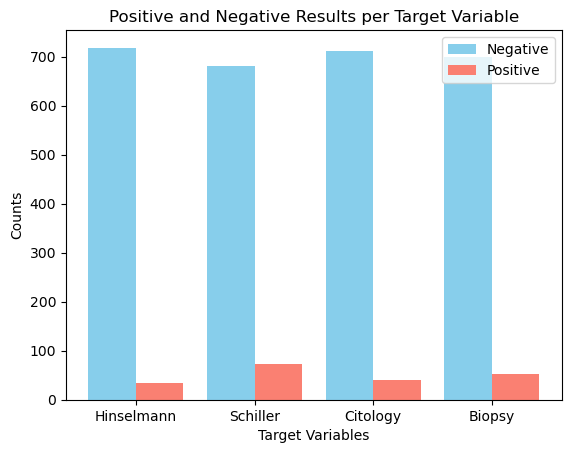

In [709]:
targets = ['Hinselmann', 'Schiller', 'Citology', 'Biopsy']
target_variables = df_cervical_cancer[targets]

negative_per_target = (target_variables == 0).sum()

positive_per_target = (target_variables == 1).sum()

proportion = (positive_per_target/negative_per_target)*100

print('The proportion of positive for each target variable, in percentage, is: \n\n{}'.format(proportion))

# Plotting
x = np.arange(len(targets))  # Positions for the bars
width = 0.4  # Width of each bar

plt.bar(x - width/2, negative_per_target, width, label='Negative', color='skyblue')
plt.bar(x + width/2, positive_per_target, width, label='Positive', color='salmon')

# Adding labels and title
plt.xlabel('Target Variables')
plt.ylabel('Counts')
plt.title('Positive and Negative Results per Target Variable')
plt.xticks(x, targets)
plt.legend()


<p style="font-size:15px;">São bué, vamos criar dados para balancear usando o smote </p> 

In [711]:
#Correlação entre as target variables
import seaborn as sns
import matplotlib.pyplot as plt
df_corr = df_cervical_cancer.drop(['Hinselmann', 'Schiller', 'Citology', 'Biopsy'],axis=1).corr()

threshold = 0.7
df_corr_filtered = df_corr[df_corr > threshold]

pairs = []
for i in range(len(df_corr_filtered.columns)):
    for j in range(i):
        if df_corr_filtered.iloc[i, j] > threshold and i!=j:
            pairs.append((df_corr_filtered.columns[i], df_corr_filtered.columns[j], df_corr_filtered.iloc[i, j]))

# Show the pairs and their correlation values
for pair in pairs:
    print(f"Features: {pair[0]} and {pair[1]} have a correlation of {pair[2]:.2f}")


Features: Smokes (years) and Smokes have a correlation of 0.72
Features: Smokes (packs/year) and Smokes (years) have a correlation of 0.72
Features: IUD (years) and IUD have a correlation of 0.75
Features: STDs (number) and STDs have a correlation of 0.92
Features: STDs:condylomatosis and STDs have a correlation of 0.73
Features: STDs:condylomatosis and STDs (number) have a correlation of 0.90
Features: STDs:vulvo-perineal condylomatosis and STDs have a correlation of 0.72
Features: STDs:vulvo-perineal condylomatosis and STDs (number) have a correlation of 0.89
Features: STDs:vulvo-perineal condylomatosis and STDs:condylomatosis have a correlation of 0.99
Features: STDs: Number of diagnosis and STDs have a correlation of 0.91
Features: STDs: Number of diagnosis and STDs (number) have a correlation of 0.90
Features: Dx:HPV and Dx:Cancer have a correlation of 0.89


In [712]:
from sklearn.preprocessing import MinMaxScaler

Y = df_cervical_cancer[targets]
X = df_cervical_cancer.drop(targets,axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

min_max_scaler = MinMaxScaler(feature_range=(0, 1))

# fit the scaler to train set and scale the train data (this will return a numpy.array)
X_train_minmax = min_max_scaler.fit_transform(X_train)

# scale the test data using the scaler that was fitted on the training data
X_test_minmax = min_max_scaler.transform(X_test)

# converting the training and test data back to a pandas.DataFrame (using the column names of the X DataFrame)
X_train_minmax = pd.DataFrame(X_train_minmax, columns=X.columns)
X_test_minmax = pd.DataFrame(X_test_minmax, columns=X.columns)




In [713]:
#SMUT

 <h3>3. Model Training </h3>

In [715]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, RocCurveDisplay
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV
from tqdm import tqdm 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import make_scorer, f1_score


<p style="font-size:15px;">FUNÇÃO BLABLABLA EXPLICA </p>

In [759]:
def calculate_metrics(model_name, model_instance, X_train, y_train, X_test, y_test):
    """
    Calculate evaluation metrics for a trained model.

    :param model_name: Name of the model (e.g., "Random Forest").
    :param model_instance: The trained model instance.
    :param X_train: Training features as a numpy array.
    :param y_train: Training labels for a single target variable.
    :param X_test: Test features as a numpy array.
    :param y_test: Test labels for a single target variable.
    :return: A dictionary containing evaluation metrics and predictions.
    """
    train_acc = model_instance.score(X_train, y_train)
    test_acc = model_instance.score(X_test, y_test)

    y_test_pred = model_instance.predict(X_test)
    y_train_pred = model_instance.predict(X_train)

    if model_name == 'SVC':
        y_scores = model_instance.decision_function(X_test)
    else:
        y_scores = model_instance.predict_proba(X_test)[1]
    f1_scorer = make_scorer(f1_score)

    f1_cv = cross_val_score(estimator=model_instance, X=X_train, y=y_train, cv=10, scoring = f1_scorer)

    metrics = {
        "Train Accuracy": train_acc,
        "Test Accuracy": test_acc,
        "CV F1 mean": np.mean(f1_cv),
        "CV F1 std": np.std(f1_cv),
        "Precision": precision_score(y_test, y_test_pred, average='micro'),
        "Recall": recall_score(y_test, y_test_pred, average='micro'),
        "Specificity": recall_score(y_test, y_test_pred, pos_label=0, average='micro'),
        "F1 Score": f1_score(y_test, y_test_pred, average='micro'),
        "Area under ROC curve": roc_auc_score(y_test, y_scores, average='micro'),
    }

    # Plot ROC curve
    RocCurveDisplay.from_predictions(y_test, y_scores)

    return metrics

<p style="font-size:15px;">EXPLICA BLABLA  </p>

In [753]:
#MUDAR!!!!!!!!1
def train_and_evaluate_multi_models(
    models: Dict[str, any],
    X_train: np.ndarray,
    Y_train: pd.Series,
    X_test: np.ndarray,
    Y_test: pd.Series,
) -> Dict[str, Dict[str, any]]:
    """
    Train and evaluate multiple machine learning models for a single target variable.

    This function trains and evaluates each model in the provided dictionary for the
    given target variable in Y_train and Y_test.

    :param models: A dictionary where keys are model names and values are model instances.
    :param X_train: Training features as a numpy array.
    :param Y_train: Training labels as a pandas Series (single column).
    :param X_test: Test features as a numpy array.
    :param Y_test: Test labels as a pandas Series (single column).
    :param calculate_metrics_function: Function to calculate performance metrics for a model.
    :return: A dictionary associating model names to their metrics and instances.
    """
    results = {}

    for model_name, model_instance in models.items():
        # Train the model
        model_instance.fit(X_train, Y_train)

        # Calculate metrics
        metrics = calculate_metrics(
            model_name, model_instance, X_train, Y_train, X_test, Y_test
        )

        # Store metrics and model instance in results
        results[model_name] = {
            "metrics": metrics,
            "instance": model_instance,
        }

    return results

<p style="font-size:15px;"> EXPLICA </p>

In [721]:
#MUDAR!!!!!!!!1

def Grid_search(model: Tuple[str, any], param_grid: dict, X_train: np.ndarray, Y_train: np.ndarray, X_test: np.ndarray, Y_test: np.ndarray) -> tuple:
    """
    Perform hyperparameter tuning using GridSearchCV and evaluate a machine learning model for multiple target variables.

    This function uses GridSearchCV to find the best hyperparameters for a given model, 
    then trains and evaluates the model for each target variable in Y_train and Y_test using cross-validation.

    :param model: A tuple containing the model name as a string and the model instance.
                  Example: ('Linear Regression', LinearRegression())
                  The model instance should be an object from scikit-learn or a similar library.
    :param param_grid: A dictionary with parameter names as keys and lists of parameter settings to try as values.
                       Example: {'alpha': [0.1, 1, 10], 'fit_intercept': [True, False]} 
                       Each key is a hyperparameter name, and each value is a list of possible values for that hyperparameter.
    :param X_train: Training features as a numpy array (n_samples, n_features).
    :param Y_train: Training labels as a numpy array (n_samples, n_targets). It can have multiple columns for multiple target variables.
    :param X_test: Test features as a numpy array (n_samples, n_features).
    :param Y_test: Test labels as a numpy array (n_samples, n_targets). It can have multiple columns for multiple target variables.
    :return: A tuple containing two elements:
             - A DataFrame with performance metrics for each target variable.
             - A list of dictionaries with the best models and their corresponding targets and parameters.
    """
    model_name, model_instance = model
    metrics_list = []
    best_models_list = []
    
     # Iterate over each target variable (column in Y_train and Y_test)
    for i in  tqdm(range(Y_train.shape[1])):
        y_train = Y_train.iloc[:, i]  # Seleciona a coluna i do DataFrame
        y_test = Y_test.iloc[:, i]    # Seleciona a coluna i do DataFrame
        target_name = Y_train.columns[i]
    # Ajustar hiperparâmetros para cada targ
        best_models = {}
    # Configurar o GridSearchCV
        
        grid_search = GridSearchCV(
            estimator=model_instance,
            param_grid=param_grid,
            scoring='f1',
            cv=5,
            n_jobs=-1)
    
    # Treinar o GridSearchCV
        grid_search.fit(X_train, y_train)
    
    # Melhor modelo para o target atual
        best_model = grid_search.best_estimator_
        best_models_list.append({"Target": target_name, "Model": best_model})

       
        metrics = calculate_metrics_classification(model_name, best_model, X_train, y_train, X_test, y_test)
        metrics["Target"] = target_name 
        metrics ["Best Parameters"] = grid_search.best_params_
        metrics_list.append(metrics)
        
    metrics = pd.DataFrame(metrics_list)
    metrics = metrics.set_index("Target")
        
    return metrics, best_models_list


In [722]:
from tqdm import tqdm  # Import necessário para a barra de progresso

def Grid_search_single_target(
    model: Tuple[str, any], 
    param_grid: dict, 
    X_train: np.ndarray, 
    Y_train: pd.DataFrame, 
    X_test: np.ndarray, 
    Y_test: pd.DataFrame, 
    target_variable: str
) -> tuple:
    """
    Perform hyperparameter tuning using GridSearchCV for a specific model and target variable.

    :param model: A tuple containing the model name as a string and the model instance.
    :param param_grid: A dictionary with parameter names as keys and lists of parameter settings to try as values.
    :param X_train: Training features as a numpy array (n_samples, n_features).
    :param Y_train: Training labels as a pandas DataFrame (n_samples, n_targets).
    :param X_test: Test features as a numpy array (n_samples, n_features).
    :param Y_test: Test labels as a pandas DataFrame (n_samples, n_targets).
    :param target_variable: The name of the target variable (a column in Y_train and Y_test) to be used.
    :return: A tuple containing:
             - A DataFrame with performance metrics for the specified target variable.
             - The best model for the specified target variable.
    """
    model_name, model_instance = model

    # Configurar a barra de progresso
    with tqdm(total=3, desc=f"Processing target: {target_variable}", unit="step") as pbar:
        # Verificar se a variável alvo existe
        if target_variable not in Y_train.columns or target_variable not in Y_test.columns:
            raise ValueError(f"Target variable '{target_variable}' not found in Y_train or Y_test.")
        
        # Incrementar barra: Verificação de variável alvo
        pbar.update(1)

        # Extrair a variável alvo específica
        y_train = Y_train[target_variable]
        y_test = Y_test[target_variable]
        
        # Configurar GridSearchCV
        grid_search = GridSearchCV(
            estimator=model_instance,
            param_grid=param_grid,
            scoring='f1',
            cv=5,
            n_jobs=-1
        )
        
        # Treinar o modelo usando GridSearchCV
        grid_search.fit(X_train, y_train)
        
        # Incrementar barra: Treinamento concluído
        pbar.update(1)

        # Melhor modelo para a variável alvo
        best_model = grid_search.best_estimator_

        # Cálculo de métricas
        metrics = calculate_metrics_classification(model_name, best_model, X_train, y_train, X_test, y_test)
        metrics["Target"] = target_variable
        metrics["Best Parameters"] = grid_search.best_params_
        
        # Incrementar barra: Cálculo de métricas concluído
        pbar.update(1)

    # Converter métricas para DataFrame
    metrics_df = pd.DataFrame([metrics])
    metrics_df = metrics_df.set_index("Target")
    
    return metrics_df, best_model


<p style="font-size:15px;"> explica </p>

In [724]:
#MUDAR!!!!!!!!1

def Confusion_matrix(models_list, X_test, Y_test):
    """
    Generate and visualize confusion matrices for multiple target variables.

    :param models_list: List of dictionaries containing the target name and model for that target.
    :param X_test: Test features as a numpy array.
    :param Y_test: Test labels as a pandas DataFrame (with multiple columns for multi-target problems).
    """
    num_targets = len(best_models_list)
    rows = (num_targets + 1) // 2  # Number of rows in the subplot grid

    fig, axes = plt.subplots(rows, 2, figsize=(12, 4 * rows))
    axes = axes.flatten()  # Flatten the axes array for easier indexing

    for i, model_info in enumerate(best_models_list):
        target_name = model_info["Target"]
        best_model = model_info["Model"]

        # Get true and predicted labels for the current target
        y_true = Y_test[target_name]
        y_pred = best_model.predict(X_test)

        # Generate confusion matrix
        cm = confusion_matrix(y_true, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)

        # Plot confusion matrix
        disp.plot(ax=axes[i], cmap=plt.cm.Blues, colorbar=False)
        axes[i].set_title(f'Matriz de Confusão para {target_name}')

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()  # Adjust layout for better visualization
    plt.show()

<p style="font-size:15px;"> EXPLICA </p>

<h4>3.1 Hinselmann </h4>

In [761]:
from sklearn.ensemble import RandomForestClassifier
from tabulate import tabulate

models = {'Random Forest': RandomForestClassifier(random_state=42, class_weight='balanced'),'SVC':SVC(class_weight='balanced'),'Logistic Regression':LogisticRegression(max_iter = 2000)} 

# Treinar e avaliar
model_metrics = train_and_evaluate_multi_models(models, X_train, y_train, X_test, y_test)

model_metrics #é um dicionário que tem {nome: [df com as métricas, model instance], ...} para os três modelos 


C:\Users\pedro\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:1011: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\pedro\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 137, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "C:\Users\pedro\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\pedro\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\pedro\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py", line 1271, in f1_score
    return fbeta_score(
           ^^^^^^^^^^^^
  File "C:\Users\p

ValueError: Found input variables with inconsistent numbers of samples: [604, 302]

In [474]:
#Inserir a Função que mostra a evolução da accuracy para cada modelo, para avaliar o overfitting

In [484]:
param_grid_rf = {
    'n_estimators': [100, 300],          # Número de árvores
    'max_depth': [10, 20],         # Profundidade máxima
    'min_samples_split': [2, 5, 10],    # Divisão mínima válida
    'min_samples_leaf': [1, 2, 4],      # Tamanho mínimo da folha
}

# incluir parametros de todos os modelos para esta variavel

#metrics, best_models_list = Grid_search(random_forest, param_grid, X_train, y_train, X_test, y_test)
#metrics, best_models_list = Grid_search(SVC, param_grid, X_train, y_train, X_test, y_test)
#metrics, best_models_list = Grid_search(LinearRegression, param_grid, X_train, y_train, X_test, y_test)
#Alterar a função para um modelo e uma variavel só 


 #explicar para apenas uma delas, o raciocinio, para nao ficar demasiado longo


In [ ]:
#Inserir a explicação ou exemplo de um seguimento de GridSearch 

Processing target: Hinselmann: 100%|██████████| 3/3 [00:11<00:00,  3.98s/step]


,Train Accuracy,Test Accuracy,CV F1 mean,CV F1 std,Precision,Recall,Specificity,F1 Score,Area under ROC curve,Best Parameters
Target,,,,,,,,,,
Hinselmann,0.930712,0.910448,0.134127,0.176699,0.0,0.0,0.96063,0.0,0.354331,"{'bootstrap': True, 'max_depth': 5, 'min_sampl..."


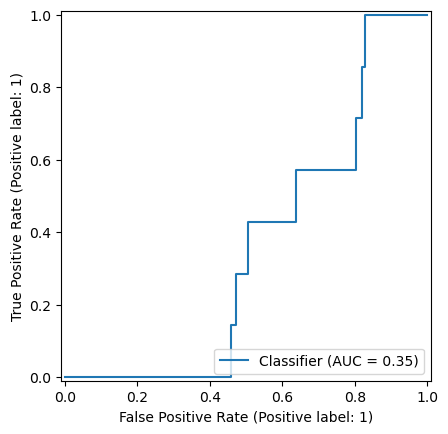

In [582]:
# Definir o grid de parâmetros com valores válidos
#param_grid_rf = {
    #'n_estimators': [100, 200],
    #'max_depth': [None, 20, 30],
    #'min_samples_split': [2, 10, 20],
    #'min_samples_leaf': [1, 4, 8],
    #'max_features': [None, 'sqrt', 'log2']
#}
#Incluir valores finais de parametros,

#metrics, best_models_list = Grid_search(random_forest, param_grid, X_train, y_train, X_test, y_test)
#metrics, best_models_list = Grid_search(SVC, param_grid, X_train, y_train, X_test, y_test)
#metrics, best_models_list = Grid_search(Logistic, param_grid, X_train, y_train, X_test, y_test)

# Parâmetros para ajuste
param_distributions = {
    'n_estimators': [50, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 6, 10],
    'min_samples_leaf': [2, 6, 10],
    'bootstrap': [True, False]
}

# Nome do modelo e instância
random_forest = ("Random Forest", RandomForestClassifier(random_state=42, class_weight='balanced'))

# Especificar a variável-alvo
target_variable = 'Hinselmann'  # Substitua pelo nome real da variável no seu dataset

# Chamar a função para a variável-alvo e modelo especificados
metrics_df, best_model = Grid_search_single_target(random_forest, param_distributions, X_train, Y_train, X_test, Y_test, target_variable)

metrics_df.head()


In [490]:
#Plot de duas matrizes de confusão inicial e final para comparação 

#Confusion_matrix(best_models_list, X_test, y_test) 


<h4>3.2 - Schiller</h4>

<h4>3.3 - Citology</h4>

<h4>3.4 - Biopsy </h4>

 <h3>4. Result evaluation</h3>

In [ ]:
#discutir os resultados em si, avaliação de matrizes e merdas

 <h3>5. Discussion</h3>

In [ ]:
#Barreiras, obstaculos e metodos de superação 

 <h3>6. Model test (onde fazemos o questionário para mostrar a aplicação do nosso modelo</h3>